In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players_2024.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,Maximilian Arnold,de GER,MF,Wolfsburg,de Bundesliga,0.0,1994.0,126.0,123.0,10852,120.5,0.11,0.22,0.09,0.19,0.08,0.23,0.05,0.20,61.0,44.0,72.13,12.0,19.67,65.36,3.26,14.75,38.68,12.59,0.27,65.32,0.51,0.36,0.10,33.24,149.70,70.52,0.80,0.87,0.05,0.81,0.65,38.10,0.79,3.14,0.24,1.59,1.24,0.05,0.10,0.14,1.59,0.11,0.07,0.01,0.02,0.03,0.00,5330.0,6757.0,78.88,110348.0,37219.0,1831.0,2054.0,88.98,2483.0,2835.0,87.58,933.0,1623.0,57.49,0.01,0.15,0.18,-0.05,1.64,4.61,0.84,0.22,5.35,56.08,47.60,8.14,4.56,0.15,0.90,4.86,0.23,2.92,1.76,0.89,0.02,44.23,0.33,0.56,0.00,0.45,0.00,7.67,0.00,3.9,4.9,50.59,0.20,0.01,0.00,1.29,1.90,0.01,1.13,0.95,0.00,0.02,7.32,0.96,0.95,1.63,0.66,0.81,0.17,0.78,1.74,0.96,1.03,0.27,2.76,1.97,0.02,44.35,4,0,0,0,0,4
1,1,Nathaniel Clyne,eng ENG,DF,Crystal Palace,eng Premier League,0.0,1991.0,70.0,61.0,5474,60.8,0.00,0.03,0.00,0.03,0.01,0.04,0.01,0.04,40.0,21.0,52.50,15.0,37.50,52.93,2.60,18.47,24.89,9.85,0.28,52.93,0.66,0.34,0.24,24.21,108.88,52.86,0.92,0.68,0.03,0.71,0.15,28.78,1.51,0.76,0.07,0.62,0.06,0.00,0.03,0.01,0.62,0.05,0.00,0.00,0.02,0.00,0.00,2158.0,2752.0,78.42,32659.0,13140.0,1185.0,1318.0,89.98,844.0,1053.0,80.15,93.0,245.0,37.96,0.00,0.03,0.02,0.01,0.33,2.17,0.49,0.24,2.68,45.26,36.84,8.27,0.39,0.02,0.08,1.15,7.88,0.00,0.00,0.00,0.00,35.49,0.15,1.08,0.00,0.05,0.00,0.00,0.00,-0.5,-0.5,42.82,0.10,0.00,0.00,0.38,0.30,0.00,1.02,0.84,0.00,0.00,4.28,0.54,0.71,1.46,0.71,0.61,0.15,0.77,1.31,0.54,0.89,0

In [4]:
# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
0,0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,0.0,2000.0,20,13,1237,13.7,0.00,0.07,0.00,0.07,0.00,0.06,0.00,0.06,34.0,14.0,41.2,12.0,35.3,51.90,3.14,18.39,22.12,12.04,0.80,51.90,2.48,1.02,0.88,26.57,158.69,81.82,1.61,0.88,0.51,0.95,0.58,27.08,1.90,1.68,0.15,1.17,0.29,0.00,0.00,0.22,0.00,0.15,0.00,0.00,0.00,0.00,0.00,450.0,581.0,77.5,7402.0,2789.0,220.0,248.0,88.7,188.0,235.0,80.0,34.0,63.0,54.0,0.07,0.06,0.07,0.01,0.51,1.82,0.95,0.15,3.14,42.41,33.07,9.27,0.80,0.15,0.22,0.95,8.47,0.00,0.00,0.00,0.00,32.85,0.07,1.68,0.15,0.00,0.00,0.00,0.02,0.0,0.0,31.3,0.07,0.00,0.00,0.88,1.90,0.15,0.58,1.39,0.00,0.07,5.47,0.36,0.80,2.12,1.46,0.51,0.15,1.46,2.48,1.02,0.66,0.36,2.70,1.97,0.00,58.8
1,1,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,0.0,2000.0,30,14,1267,14.1,0.14,0.28,0.14,0.28,0.14,0.27,0.14,0.27,77.0,34.0,44.2,41.0,53.2,47.87,0.78,7.66,21.35,20.78,3.33,47.87,5.46,2.41,2.91,28.79,192.98,98.37,2.62,2.06,0.64,2.91,2.70,32.41,6.45,3.76,0.57,2.91,0.07,0.57,0.21,0.00,0.00,0.43,0.00,0.14,0.00,0.00,0.00,365.0,472.0,77.3,4890.0,1506.0,206.0,240.0,85.8,105.0,130.0,80.8,19.0,32.0,59.4,0.14,0.13,0.14,0.01,1.56,2.13,0.99,0.21,3.97,33.48,31.13,2.06,0.21,0.35,0.07,1.56,0.85,0.43,0.14,0.21,0.00,25.89,0.28,1.49,1.28,0.50,0.11,0.29,0.11,0.0,0.0,44.8,0.21,0.07,0.07,1.06,1.77,0.35,0.14,1.28,0.00,0.00,6.24,0.92,1.13,2.27,0.92,0.92,0.43,1.13,2.27,1.13,1.84,0.07,2.41,0.28,0.00,50.0
2,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,0.0,1987.0,31,31,2781,30.9,0.13,0.13,0.10,0.10,0.11,0.12,0.09,0.09,15.0,8.0,53.3,7.0,46.7,70.71,9.

In [5]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (MF) and defenders (DF) from the 'final_player' DataFrame
midfielder_players = final_player[final_player['Pos'].isin(['MF'])]
newbie = newbie[newbie['Pos'].isin(['MF'])]
player_2021 = player_2021[player_2021['Pos'].isin(['MF'])]
player_2022 = player_2022[player_2022['Pos'].isin(['MF'])]
player_2023 = player_2023[player_2023['Pos'].isin(['MF'])]
player_2024 = player_2024[player_2024['Pos'].isin(['MF'])]

# Reset the index if needed
midfielder_players = midfielder_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)
player_2024=player_2024.reset_index(drop=True)

In [6]:
Modric=midfielder_players[midfielder_players['Player']=='Luka Modrić']
Modric

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
79,327,Luka Modrić,hr CRO,MF,Real Madrid,es La Liga,0.0,1985.0,128.0,94.0,8197,91.2,0.14,0.36,0.12,0.34,0.12,0.33,0.1,0.31,214.0,127.0,59.35,73.0,34.11,86.86,1.01,13.54,45.54,28.49,2.16,86.84,2.34,1.39,0.8,59.44,303.98,139.54,2.6,2.41,0.59,1.26,1.02,69.17,4.02,4.15,0.45,3.27,0.53,0.13,0.11,0.06,3.27,0.36,0.04,0.01,0.02,0.01,0.0,6267.0,7208.0,86.95,103333.0,28902.0,3036.0,3219.0,93.69,2045.0,2297.0,89.03,685.0,949.0,72.18,0.07,0.22,0.22,0.0,2.02,7.84,1.75,0.17,9.67,79.04,73.14,5.65,2.79,0.35,1.56,3.06,0.52,2.05,0.66,0.82,0.0,68.72,0.25,1.2,0.0,0.44,0.0,7.58,0.0,2.7,2.3,43.18,0.19,0.0,0.0,1.03,1.12,0.07,1.09,0.63,0.0,0.0,5.33,0.48,0.63,1.05,0.46,0.39,0.21,0.42,1.24,0.82,0.57,0.17,2.14,0.43,0.01,33.46,4,0,4,0,0,0


In [7]:
Modric_2024=player_2024[player_2024['Player']=='Luka Modrić']
Modric_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
198,1782,Luka Modrić,hr CRO,MF,Real Madrid,es La Liga,0.0,1985.0,32,18,1688,18.8,0.11,0.43,0.11,0.43,0.07,0.37,0.07,0.37,45.0,21.0,46.7,17.0,37.8,96.38,1.17,13.62,51.97,31.54,2.61,96.38,2.39,1.12,0.9,63.94,322.93,148.67,2.82,3.03,0.69,0.64,1.01,75.9,4.52,5.6,0.69,3.94,1.12,0.11,0.21,0.11,0.11,0.64,0.05,0.0,0.0,0.0,0.0,1452.0,1669.0,87.0,23577.0,7217.0,790.0,835.0,94.6,459.0,513.0,89.5,150.0,226.0,66.4,0.32,0.29,0.26,0.03,2.93,8.62,2.23,0.21,10.43,88.78,80.11,8.3,3.56,0.32,1.44,4.79,0.48,3.67,0.8,2.02,0.0,77.23,0.37,1.22,1.33,0.53,0.08,0.2,0.05,0.7,0.7,50.0,0.11,0.0,0.0,1.01,1.12,0.11,1.12,0.8,0.0,0.0,4.89,0.43,0.43,1.17,0.53,0.32,0.32,0.48,1.33,0.85,0.69,0.21,2.29,0.48,0.0,36.0


In [8]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = midfielder_players[params].rank(pct=True) * 100

# Get the row of Modric' stats from the percentile ranks DataFrame
modric_percentile_ranks = round(players_percentile_ranks.iloc[[79]],0)

# Print the percentile ranks for Modric
modric_percentile_ranks


,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90
79,76.0,90.0,76.0,91.0,70.0,89.0,67.0,88.0,91.0,92.0,74.0,88.0,30.0,97.0,9.0,61.0,89.0,98.0,80.0,97.0,82.0,86.0,74.0,98.0,97.0,95.0,90.0,92.0,93.0,48.0,66.0,98.0,85.0,88.0,85.0,96.0,82.0,73.0,47.0,31.0,98.0,93.0,83.0,71.0,67.0,66.0,38.0,96.0,95.0,83.0,95.0,93.0,95.0,94.0,95.0,89.0,90.0,69.0,96.0,94.0,84.0,72.0,94.0,95.0,54.0,93.0,98.0,96.0,69.0,100.0,98.0,97.0,90.0,92.0,89.0,99.0,84.0,86.0,86.0,84.0,86.0,42.0,97.0,75.0,88.0,20.0,71.0,27.0,80.0,20.0,89.0,89.0,37.0,34.0,34.0,40.0,22.0,40.0,65.0,55.0,5.0,36.0,29.0,26.0,20.0,18.0


In [9]:
# Extract the percentile ranks, transpose, and sort them in descending order
modric_percentile_ranks_percentile_ranks_sorted = modric_percentile_ranks.T.sort_values(by=79, ascending=False)

# Get the top 20 parameters
top_20_params = modric_percentile_ranks_percentile_ranks_sorted.index[:30]
top_20_params_values = modric_percentile_ranks_percentile_ranks_sorted[79].head(30)

# Display the top 20 parameters and their values
print("Top 20 Parameters:")
print(top_20_params)
print("Values:")
print(top_20_params_values)

Top 20 Parameters:
Index(['Progressive_Passes_per_90', 'Switches_per_90', 'Carries_per_90',
       'Passes_1/3_per_90', 'Passes_Received_per_90', 'Defensive_Shot_per_90',
       'Touches_Att_3rd_per_90', 'Passes_Attempted_per_90',
       'Passes_Cmp_per_90', 'Touches_per_90', 'Tocuhes_Live_Balls_per_90',
       'Live_Ball_Passes_per_90', 'Total_Distance_per_90', 'Passes_Total_Cmp',
       'Passes_Penalty_Area_per_90', 'Passes_Long_Cmp',
       'Pass_Live_Shot_per_90', 'Progressive_Distance_Carried_per_90',
       'Passes_Total_Att', 'Passes_TotDist', 'Passes_Short_Cmp',
       'Passes_Short_Cmp%', 'xA_per_90', 'Passes_Long_Att', 'xAG_per_90',
       'Passes_Short_Att', 'Carries_Penalty_Area_per_90', 'Passes_PrgDist',
       'Key_Passes_per_90', 'Pass_Live_Goal_per_90'],
      dtype='object')
Values:
Progressive_Passes_per_90              100.0
Switches_per_90                         99.0
Carries_per_90                          98.0
Passes_1/3_per_90                       98.0
Passes_Re

In [10]:
params = ['Progressive_Passes_per_90', 'Switches_per_90', 'Carries_per_90', 
          'Passes_1/3_per_90', 'Passes_Received_per_90', 'Touches_Att_3rd_per_90',
          'Passes_Attempted_per_90', 'Passes_Cmp_per_90', 'Touches_per_90',
          'Live_Ball_Passes_per_90', 'Progressive_Distance_Carried_per_90',
          'Passes_Total_Cmp', 'Passes_Penalty_Area_per_90', 'Key_Passes_per_90', 
          'Passes_PrgDist']

# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = midfielder_players[params].rank(pct=True) * 100

# Get the row of a specific player's stats from the percentile ranks DataFrame
modric_percentile_ranks = round(players_percentile_ranks.iloc[[79]],0)

# Print the percentile ranks for the player
modric_percentile_ranks


,Progressive_Passes_per_90,Switches_per_90,Carries_per_90,Passes_1/3_per_90,Passes_Received_per_90,Touches_Att_3rd_per_90,Passes_Attempted_per_90,Passes_Cmp_per_90,Touches_per_90,Live_Ball_Passes_per_90,Progressive_Distance_Carried_per_90,Passes_Total_Cmp,Passes_Penalty_Area_per_90,Key_Passes_per_90,Passes_PrgDist
79,100.0,99.0,98.0,98.0,98.0,98.0,98.0,97.0,97.0,97.0,95.0,96.0,96.0,93.0,93.0


In [11]:
modric_percentile_ranks_list = modric_percentile_ranks.values.flatten().tolist()

modric_percentile_ranks_list

[100.0,
 99.0,
 98.0,
 98.0,
 98.0,
 98.0,
 98.0,
 97.0,
 97.0,
 97.0,
 95.0,
 96.0,
 96.0,
 93.0,
 93.0]

In [12]:
params = ['Progressive_Passes_per_90', 'Switches_per_90', 'Carries_per_90', 
          'Passes_1/3_per_90', 'Passes_Received_per_90', 'Touches_Att_3rd_per_90',
          'Passes_Attempted_per_90', 'Passes_Cmp_per_90', 'Touches_per_90',
          'Live_Ball_Passes_per_90', 'Progressive_Distance_Carried_per_90',
          'Passes_Total_Cmp', 'Passes_Penalty_Area_per_90', 'Key_Passes_per_90', 
          'Passes_PrgDist']

# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of a specific player's stats from the percentile ranks DataFrame
modric_2024_percentile_ranks = round(players_percentile_ranks.iloc[[198]],0)

# Print the percentile ranks for the player
modric_2024_percentile_ranks


,Progressive_Passes_per_90,Switches_per_90,Carries_per_90,Passes_1/3_per_90,Passes_Received_per_90,Touches_Att_3rd_per_90,Passes_Attempted_per_90,Passes_Cmp_per_90,Touches_per_90,Live_Ball_Passes_per_90,Progressive_Distance_Carried_per_90,Passes_Total_Cmp,Passes_Penalty_Area_per_90,Key_Passes_per_90,Passes_PrgDist
198,99.0,99.0,98.0,98.0,97.0,99.0,98.0,97.0,98.0,97.0,96.0,86.0,96.0,98.0,87.0


In [13]:
modric_2024_percentile_ranks_list = modric_2024_percentile_ranks.values.flatten().tolist()

modric_2024_percentile_ranks_list

[99.0,
 99.0,
 98.0,
 98.0,
 97.0,
 99.0,
 98.0,
 97.0,
 98.0,
 97.0,
 96.0,
 86.0,
 96.0,
 98.0,
 87.0]

In [14]:
image_path = "Modric.jpg"
fdj_cropped = Image.open(image_path)


In [15]:
params = ['Progressive_Passes_per_90', 'Switches_per_90', 'Carries_per_90', 
          'Passes_Final_Third_per_90', 'Passes_Received_per_90', 'Touches_Attempted_Final_Third_per_90',
          'Passes_Attempted_per_90', 'Passes_Completed_per_90', 'Touches_per_90',
          'Live_Ball_Passes_per_90', 'Progressive_Distance_Carried_per_90',
          'Passes_Total_Completed', 'Passes_Penalty_Area_per_90', 'Key_Passes_per_90', 
          'Passes_Progressive_Distance']

split_params = [param.replace('_', '\n') for param in params]

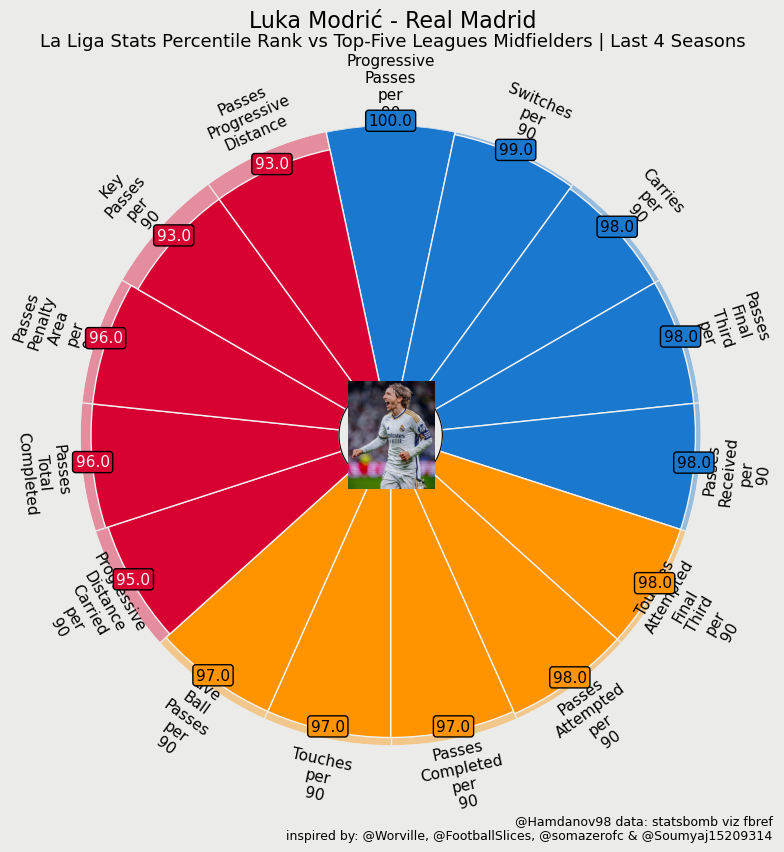

In [16]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    modric_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Luka Modrić - Real Madrid", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"La Liga Stats Percentile Rank vs Top-Five Leagues Midfielders | Last 4 Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Modric_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


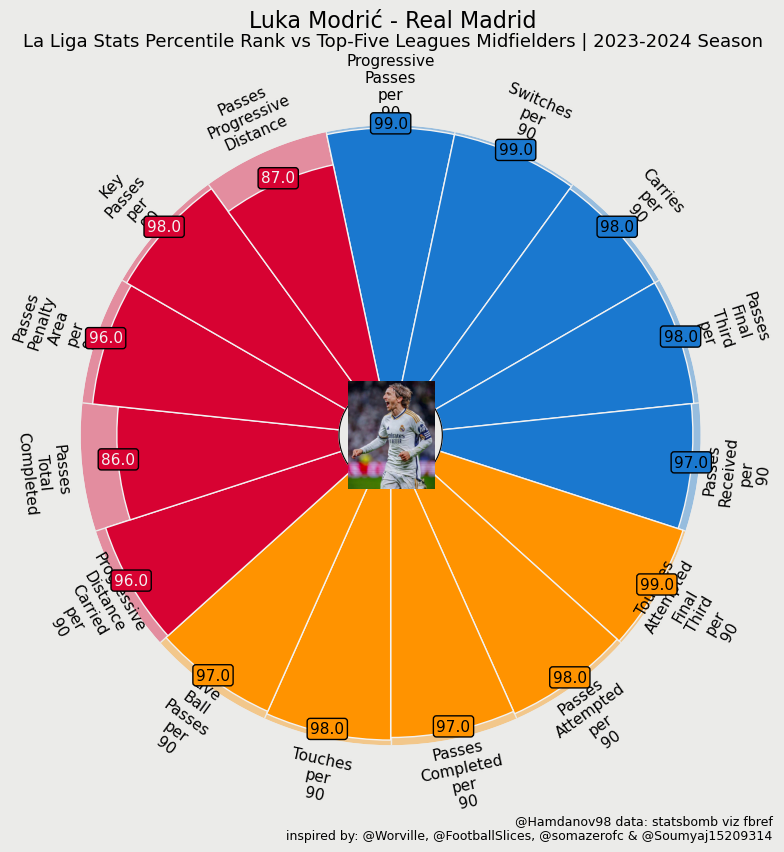

In [17]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    modric_2024_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Luka Modrić - Real Madrid", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"La Liga Stats Percentile Rank vs Top-Five Leagues Midfielders | 2023-2024 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Modric_2024_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [18]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90','Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in midfielder_players.columns:
        midfielder_players[feature]=-midfielder_players[feature]
        player_2024[feature]=-player_2024[feature]
        

In [19]:
params = ['Progressive_Passes_per_90', 'Switches_per_90', 'Carries_per_90', 
          'Passes_1/3_per_90', 'Passes_Received_per_90', 'Touches_Att_3rd_per_90',
          'Passes_Attempted_per_90', 'Passes_Cmp_per_90', 'Touches_per_90',
          'Live_Ball_Passes_per_90', 'Progressive_Distance_Carried_per_90',
          'Passes_Total_Cmp', 'Passes_Penalty_Area_per_90', 'Key_Passes_per_90', 
          'Passes_PrgDist']

In [20]:
# Normalize data
numerical_midfielder_players = midfielder_players[params].replace([np.inf, -np.inf], 0)
normalized_midfielder_players = (numerical_midfielder_players - numerical_midfielder_players.mean()) / numerical_midfielder_players.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_midfielder_players)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [21]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_midfielder_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=midfielder_players.index)

In [22]:
# Get de Ligt's row and compute cosine similarity
modric_index = midfielder_players.index[midfielder_players['Player'] == 'Luka Modrić'][0]
modric_data = transformed_df.loc[modric_index].values.reshape(1, -1)

# Remove de Ligt from the dataset for comparison
transformed_df = transformed_df.drop(index=modric_index)

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, modric_data).flatten()
transformed_df['similarity_to_modric'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_modric', ascending=False).index
top_similar_players = midfielder_players.loc[top_similar_players_indices]

In [24]:
# Visualize the results
midfielder_players['similarity_to_modric'] = transformed_df['similarity_to_modric']
midfielder_players_sorted = midfielder_players.sort_values(by='similarity_to_modric', ascending=False)
midfielder_players_sorted

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,similarity_to_modric
59,239,Toni Kroos,de GER,MF,Real Madrid,es La Liga,0.0,1990.0,119.0,98.0,8499,94.4,0.07,0.34,0.07,0.34,0.08,0.28,0.08,0.28,69.0,39.0,56.52,23.0,33.33,105.84,2.12,20.34,63.03,23.27,0.85,105.84,0.73,0.41,0.25,69.87,316.23,166.40,1.76,2.07,0.18,-0.42,-0.39,84.82,1.61,4.35,0.37,2.64,1.45,0.02,0.13,0.07,2.64,0.22,0.11,0.00,0.01,0.00,0.02,8548.0,9408.0,90.86,158998.0,54978.0,3886.0,4011.0,96.65,3188.0,3393.0,93.96,1280.0,1680.0,76.19,0.08,0.20,0.23,0.06,2.49,13.09,1.22,0.17,12.24,99.66,89.80,9.42,4.95,0.23,2.43,4.79,0.46,4.00,1.36,1.34,0.02,90.55,0.44,0.54,0.00,0.51,0.00,3.37,0.00,-5.000000e-01,-5.000000e-01,57.18,-0.16,-0.01,-0.01,-0.97,1.53,0.04,0.72,1.21,0.00,-0.01,5.80,0.37,-0.28,1.91,0.67,0.95,0.28,0.76,2.20,1.44,0.92,0.18,2.63,0.48,0.05,34.47,4,0,4,0,0,0,0.971223
122,506,Federico Valverde,uy URU,MF,Real Madrid,es La Liga,0.0,1998.0,126.0,96.0,8569,95.3,0.12,0.26,0.12,0.26,0.12,0.29,0.12,0.29,166.0,108.0,65.06,54.0,32.53,69.23,1.58,9.80,35.93,24.36,2.01,69.23,1.74,1.13,0.57,44.88,264.22,142.66,3.06,2.99,0.35,-0.99,-0.37,53.82,3.96,3.37,0.38,3.02,0.02,0.10,0.12,0.05,3.02,0.35,0.00,0.01,0.02,0.00,0.00,5040.0,5718.0,88.14,76640.0,19784.0,3138.0,3346.0,93.79,1575.0,1768.0,89.08,368.0,512.0,71.88,0.07,0.18,0.14,-0.04,1.45,5.61,1.22,0.13,6.37,60.00,58.85,0.86,0.40,0.23,0.87,1.02,0.41,0.01,0.00,0.00,0.00,52.88,0.28,0.80,0.00,0.59,0.00,5.15,0.00,1.000000e+00,1.000000e+00,66.91,-0.06,-0.00,-0.00,-0.62,0.50,0.1

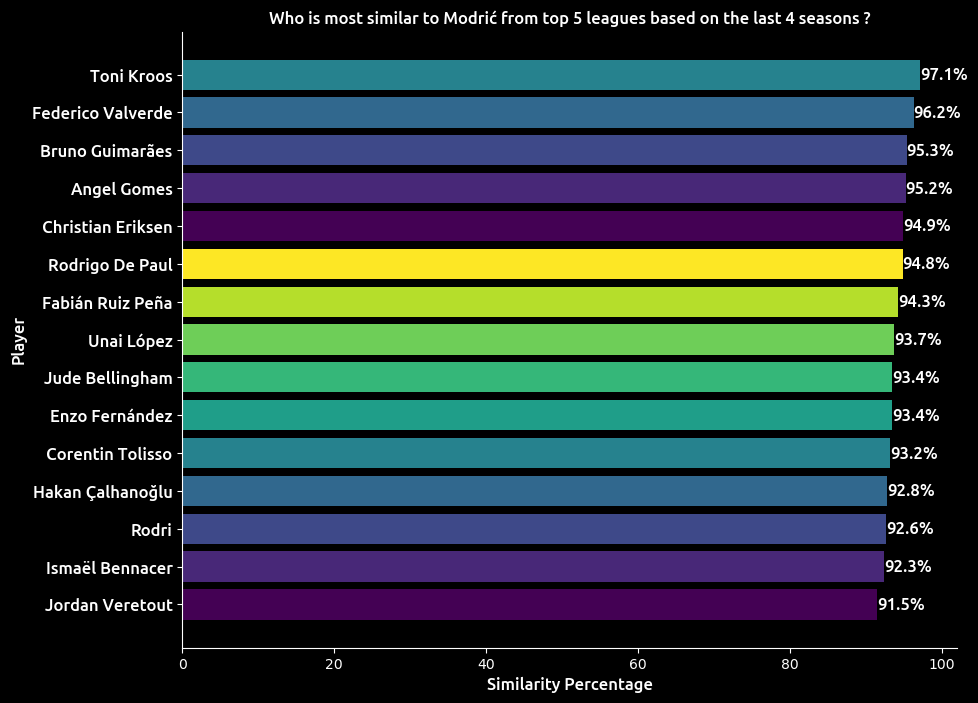

In [25]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the midfielder_players DataFrame by similarity_to_modric in descending order
midfielder_players_sorted = midfielder_players.sort_values(by='similarity_to_modric', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(midfielder_players_sorted['Player'].head(15)[::-1], (midfielder_players_sorted['similarity_to_modric'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Modrić from top 5 leagues based on the last 4 seasons ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(midfielder_players_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()
